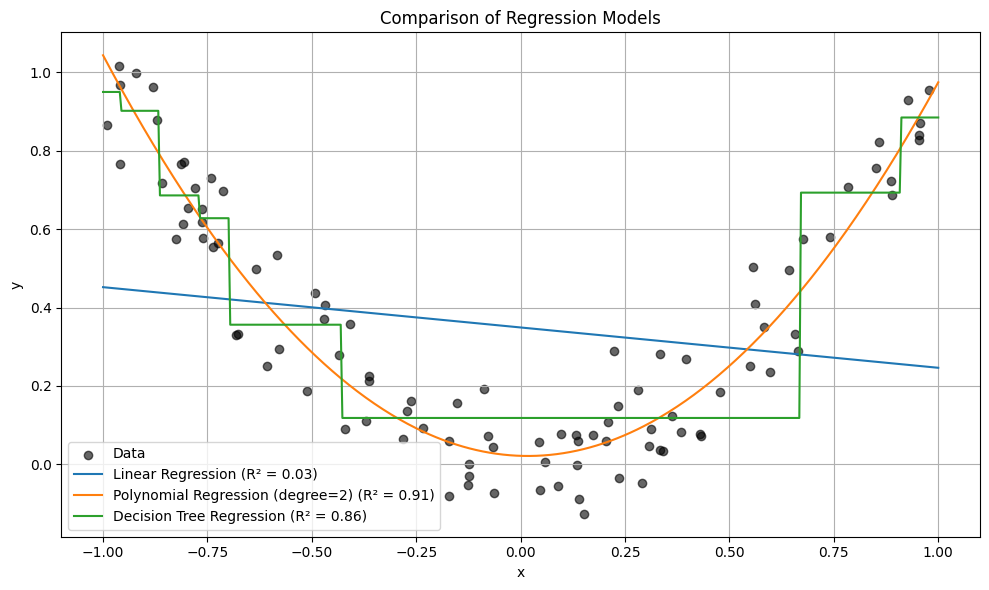

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# 1. Generate synthetic non-linear data
np.random.seed(0)
X = np.sort(2 * np.random.rand(100, 1) - 1, axis=0)  # x in range [-1, 1]
y = X**2 + 0.1 * np.random.randn(100, 1)  # y = x^2 + noise

# 2. Define 3 models
models = {
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (degree=2)": make_pipeline(PolynomialFeatures(2), LinearRegression()),
    "Decision Tree Regression": DecisionTreeRegressor(max_depth=3, random_state=0)
}

# 3. Fit and predict with each model
X_test = np.linspace(-1, 1, 500).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='black', label='Data', alpha=0.6)

for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X_test)
    score = r2_score(y, model.predict(X))
    plt.plot(X_test, y_pred, label=f'{name} (R² = {score:.2f})')

# 4. Plot
plt.title('Comparison of Regression Models')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
